In [76]:
import os
import json
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
alpha_list = [
    "-1.0",
    "-0.9",
    "-0.8",
    "-0.7",
    "-0.6",
    "-0.5",
    "-0.4",
    "-0.3",
    "-0.2",
    "-0.1",
    "0.0",
    "0.1",
    "0.2",
    "0.3",
    "0.4",
    "0.5",
    "0.6",
    "0.7",
    "0.8",
    "0.9",
    "1.0",
]

In [78]:
def read_tests(name):
    res_tests = {}
    directory_path = f'new_tests/{name}'
    for entry in os.listdir(directory_path):
        full_path = os.path.join(directory_path, entry)
        # tests[entry] = []
        for test_file in os.listdir(full_path):
            test_path = os.path.join(full_path, test_file)
            with open(test_path, 'r') as f:
                test_data = json.load(f)
                res_tests[entry] = test_data
    return res_tests
def read_results(name):
    results_file = f'{name}.json'
    results_file = os.path.join('./single_task_scenario2', results_file)
    with open(results_file, 'r') as f:
        result = json.load(f)
    return result

In [79]:
s = '32_16_8.json'
s = Path(s).stem
s
# list(map(int, Path(s).stem.split('_')))

'32_16_8'

In [80]:
t = read_tests('8_8_4')
t['-0.1'][1][0]

[0, 0, 0, 0, 1, 1, 3, 3]

In [81]:
%%time
real_spines = {}
results_dir = './single_task_scenario2'
for entry in os.listdir(results_dir):
    if not entry.endswith('json'):
        continue
    # entry = os.path.join(results_dir, entry)
    print(entry)
    entry = Path(entry).stem
    hosts, leaves, spines = list(map(int, entry.split('_')))
    
    tests, results = read_tests(entry), read_results(entry)
    Data = {k:[(tests[k][i][0], results[k][i]) for i in range(len(tests[k]))] for k in tests}
    
    for alpha, tests_data in Data.items():
        for test, res in tests_data:
            # if res != 1:
            #     continue
            # print(test)
            # distribute_spines = max(test)
            distribute_spines = spines
            # distribute_leaves = len([1 for x in test if x > 0])
            distribute_leaves = leaves
            
            if distribute_spines not in real_spines:
                real_spines[distribute_spines] = {}
            if distribute_leaves not in real_spines[distribute_spines]:
                real_spines[distribute_spines][distribute_leaves] = {}
            if hosts not in real_spines[distribute_spines][distribute_leaves]:
                real_spines[distribute_spines][distribute_leaves][hosts] = {}
            if alpha not in real_spines[distribute_spines][distribute_leaves][hosts]:
                real_spines[distribute_spines][distribute_leaves][hosts][alpha] = {0:set(), 1:set()}
            
            real_spines[distribute_spines][distribute_leaves][hosts][alpha][res].add(tuple(test))

128_32_16.json
128_32_8.json
128_64_16.json
16_16_4.json
16_16_8.json
16_8_4.json
256_32_16.json
256_64_16.json
256_64_32.json
32_16_4.json
32_16_8.json
32_32_8.json
512_128_32.json
512_64_16.json
512_64_32.json
64_16_8.json
64_32_16.json
64_32_8.json
8_8_4.json
CPU times: total: 10.9 s
Wall time: 11 s


In [82]:
s_l = []
for s, s_d in real_spines.items():
    for l in s_d:
        s_l.append((s,l))
s_l.sort()
s_l

[(4, 8), (4, 16), (8, 16), (8, 32), (16, 32), (16, 64), (32, 64), (32, 128)]

In [85]:
def plot_statistic(spines, leaves, data):
    plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

    for host, host_dict in data[spines][leaves].items():
        # x = []
        # y = []
        # for alpha, res_dict in host_dict.items():
        #     true, false = len(res_dict[1]), len(res_dict[0])
        #     # if true + false < 50:
        #     #     continue
        #     x.append(float(alpha))
        #     # print(x)
        #     y.append(true / (true + false))
        host_data = [(float(alpha), len(res_dict[1])/(len(res_dict[1]) + len(res_dict[0]))) for alpha, res_dict in host_dict.items()]
        host_data.sort()
        plt.scatter([x[0] for x in host_data], [x[1] for x in host_data], label=f'{host} hosts on the task', s=50, alpha=0.7)  # Added s for size
        # plt.scatter(x, y, label=f'{host} hosts on the task', s=50, alpha=0.7)  # Added s for size


    plt.xlabel('Alpha', fontsize=14)  # Increased fontsize
    plt.ylabel('Success Rate', fontsize=14)  # Increased fontsize
    plt.title(f'Success Rate vs. Alpha for {spines} spines and {leaves} leaves', fontsize=16)  # More descriptive title

    # Customize the legend
    plt.legend(loc='best', fontsize=12, shadow=True)  # Added location, fontsize and shadow

    plt.grid(True, linestyle='--', alpha=0.5)  # Added a grid for easier reading
    plt.xticks(list(map(float, alpha_list)))
    plt.tight_layout()
    plt.savefig(f'../plots/1_task_scenario_2_{spines}_{leaves}.pdf', format='pdf')

    plt.show()

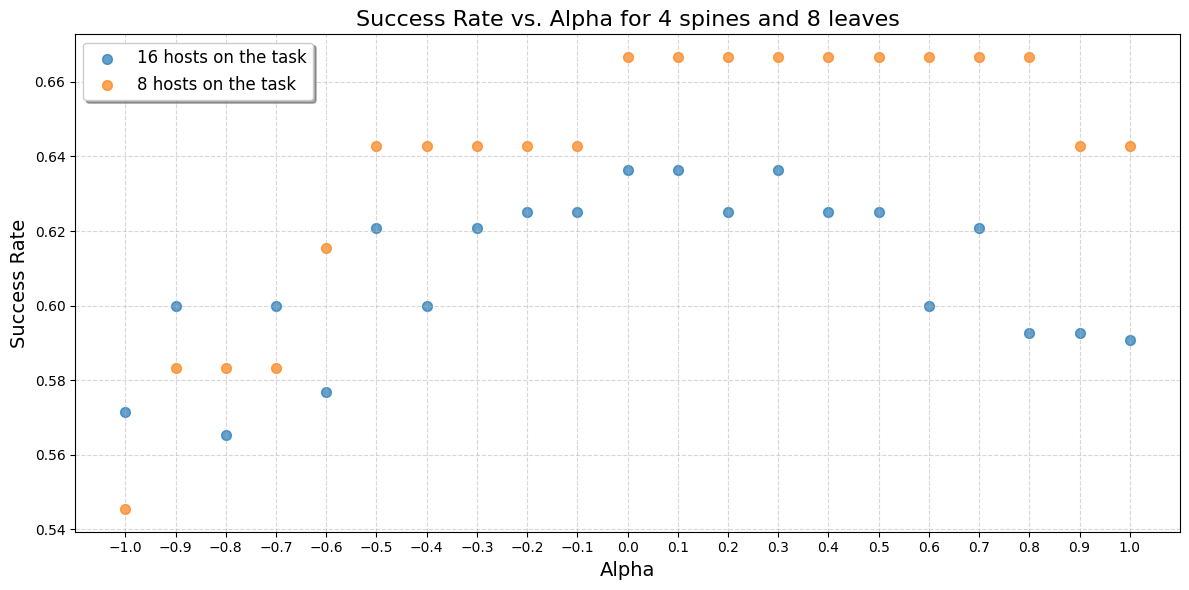

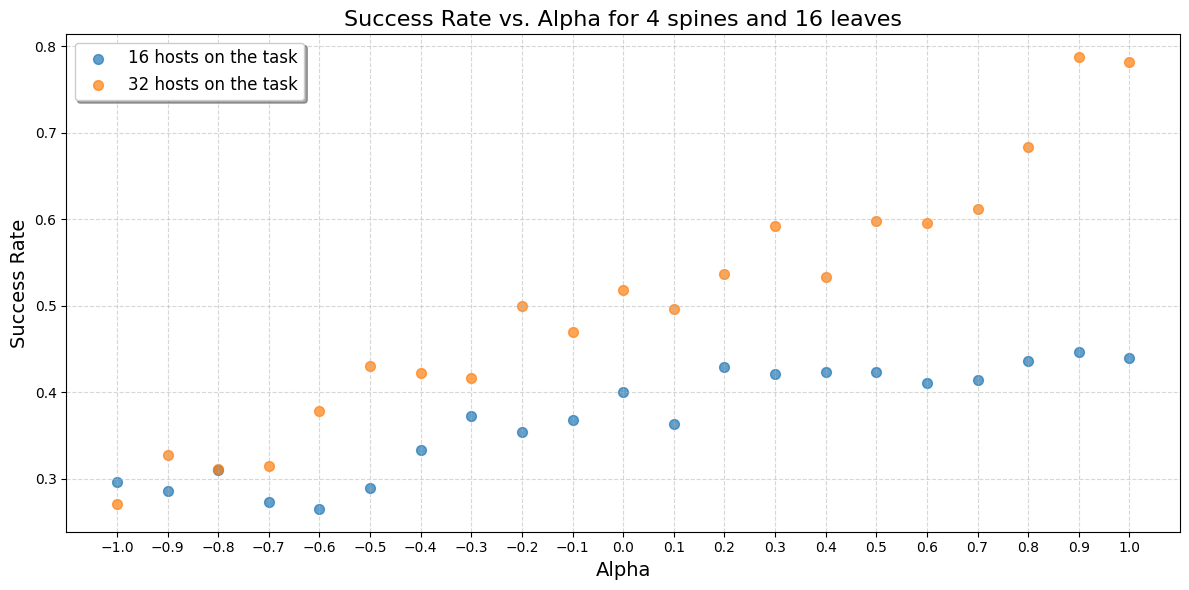

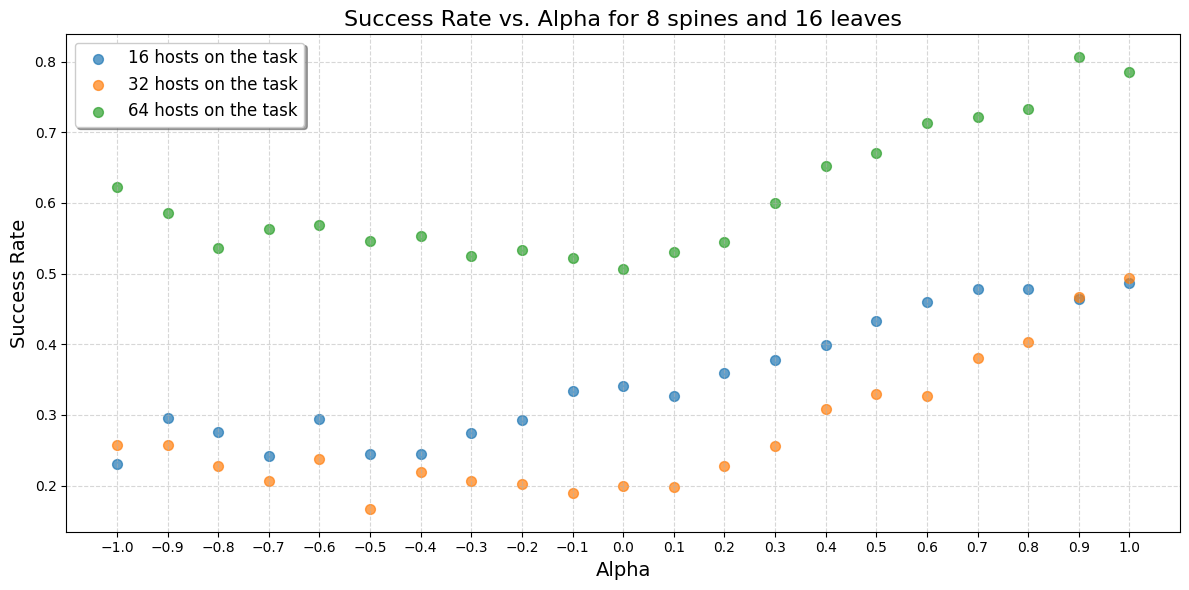

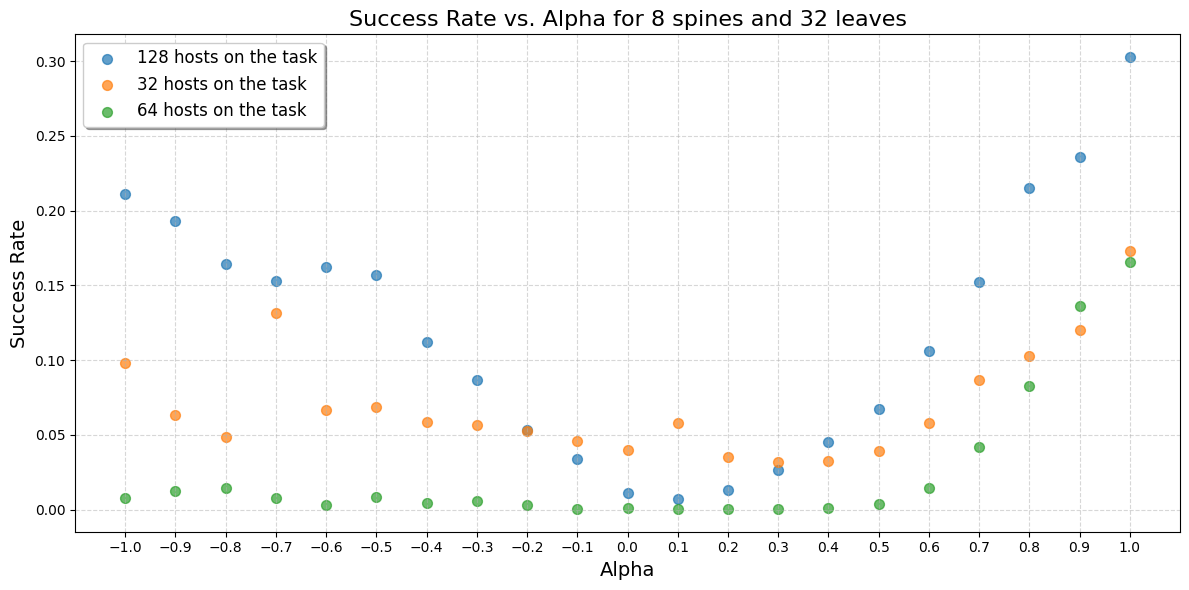

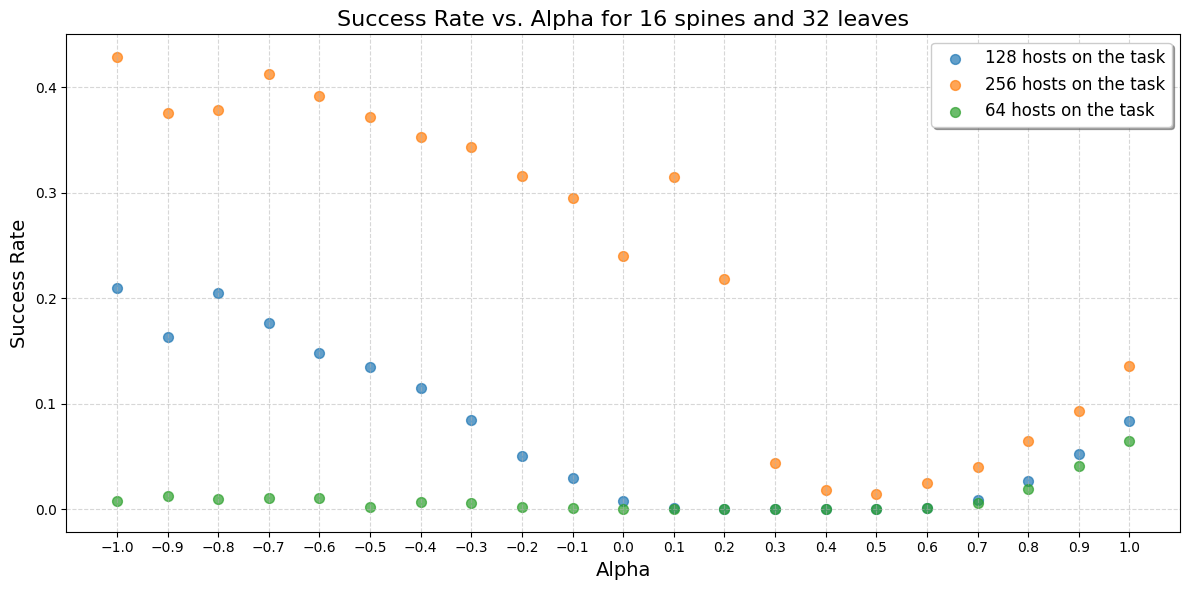

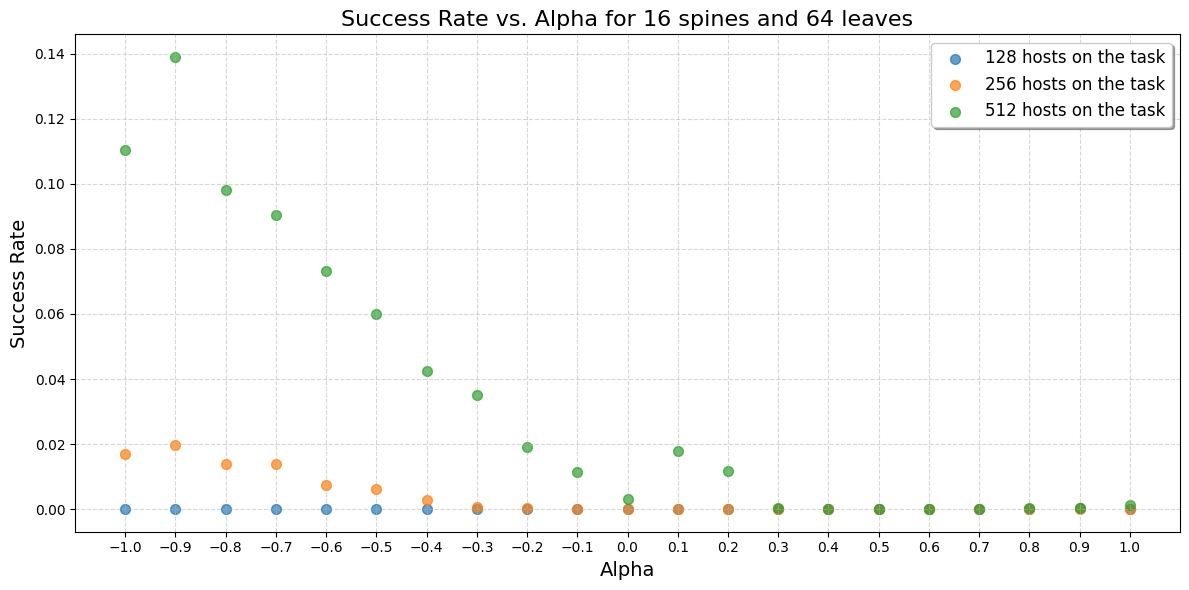

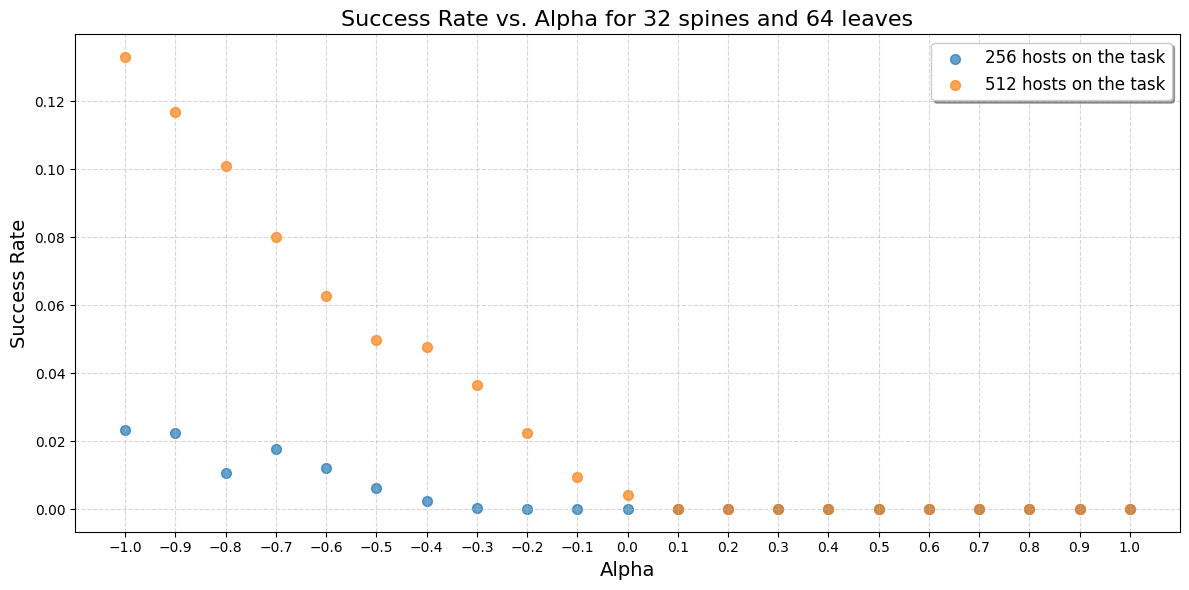

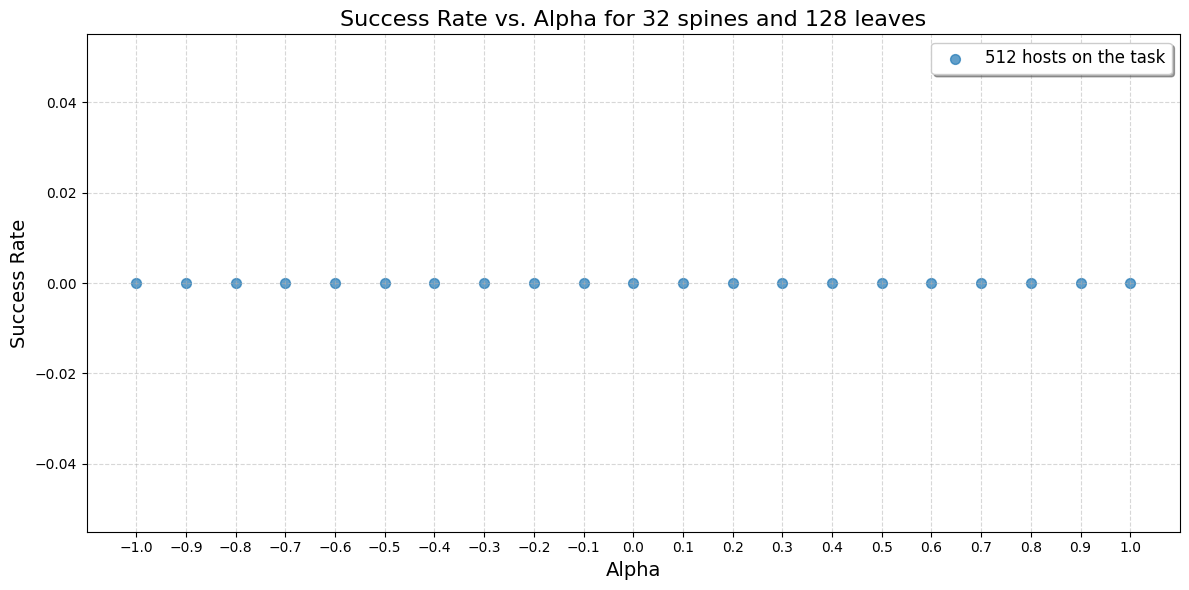

In [86]:
for s, l in s_l:
    plot_statistic(s, l, real_spines)
    print('\n\n\n\n')

In [11]:
len(res.keys())

15

In [12]:
print(res['1_2_16']['-0.1'])

[1]


In [13]:
def plot_scenario_1(res, spines):
    plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
    
    for leaves_spines, host_dict in res.items():
        _, l, s = list(map(int, leaves_spines.split('_')))
        if s != spines:
            continue
            
        host_data = []
        # host_data = [(float(alpha), ) for alpha, results in host_dict.items()]
        for alpha, results in host_dict.items():
            true = len([x for x in results if x == 1])
            false = len([x for x in results if x == 0])
            host_data.append((float(alpha), true/(true+false)))
        host_data.sort()
        plt.scatter([x[0] for x in host_data], [x[1] for x in host_data], label=f'{l} leaves', s=50, alpha=0.7)  # Added s for size
        # plt.scatter(x, y, label=f'{host} hosts on the task', s=50, alpha=0.7)  # Added s for size


    plt.xlabel('Alpha', fontsize=14)  # Increased fontsize
    plt.ylabel('Success Rate', fontsize=14)  # Increased fontsize
    plt.title(f'Success Rate vs. Alpha for {spines} spines and {spines*2} hosts', fontsize=16)  # More descriptive title

    # Customize the legend
    plt.legend(loc='best', fontsize=12, shadow=True)  # Added location, fontsize and shadow

    plt.grid(True, linestyle='--', alpha=0.5)  # Added a grid for easier reading
    plt.xticks(list(map(float, alpha_list)))
    plt.tight_layout()
    plt.show()

In [70]:
def plot_scenario_1_split(res, spines, alpha_list, max_per_plot=5):
    markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', 'X', '8']  # Add more if needed

    # Gather all relevant (leaves, host_data) for the given spines
    plot_items = []
    for leaves_spines, host_dict in res.items():
        _, l, s = list(map(int, leaves_spines.split('_')))
        if s != spines:
            continue
        host_data = []
        for alpha, results in host_dict.items():
            true = len([x for x in results if x == 1])
            false = len([x for x in results if x == 0])
            host_data.append((float(alpha), true/(true+false)))
        host_data.sort()
        plot_items.append((l, host_data))
    
    # Sort by leaves for consistent grouping
    plot_items.sort(key=lambda x: x[0])
    
    # Chunk into groups of max_per_plot
    for i in range(0, len(plot_items), max_per_plot):
        plt.figure(figsize=(12, 6))
        for idx, (l, host_data) in enumerate(plot_items[i:i+max_per_plot]):
            marker = markers[idx % len(markers)]  # cycle through markers if more groups than markers
            plt.scatter([x[0] for x in host_data], [x[1] for x in host_data], 
                        label=f'{l} leaves', s=50, alpha=0.5, marker=marker)
        
        plt.xlabel('Alpha', fontsize=14)
        plt.ylabel('Success Rate', fontsize=14)
        plt.title(f'Success Rate vs. Alpha for {spines} spines and {spines*2} hosts', fontsize=16)
        plt.legend(loc='best', fontsize=12, shadow=True)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(list(map(float, alpha_list)))
        plt.tight_layout()
        plt.savefig(f'1 task scenario 1 {i}.pdf', format='pdf')
        plt.show()

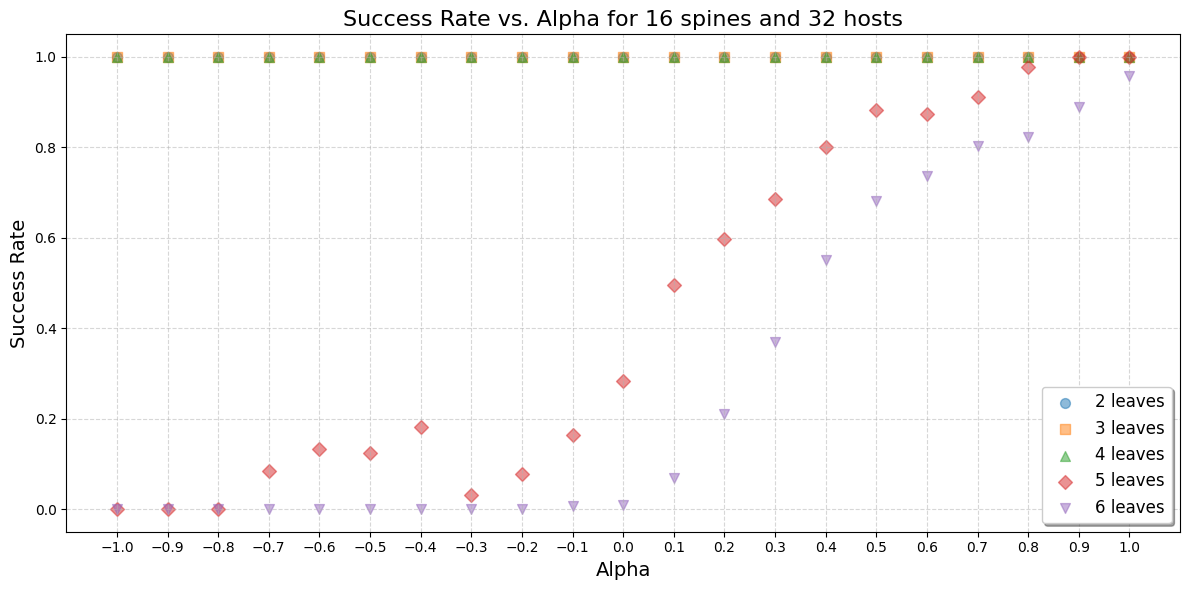

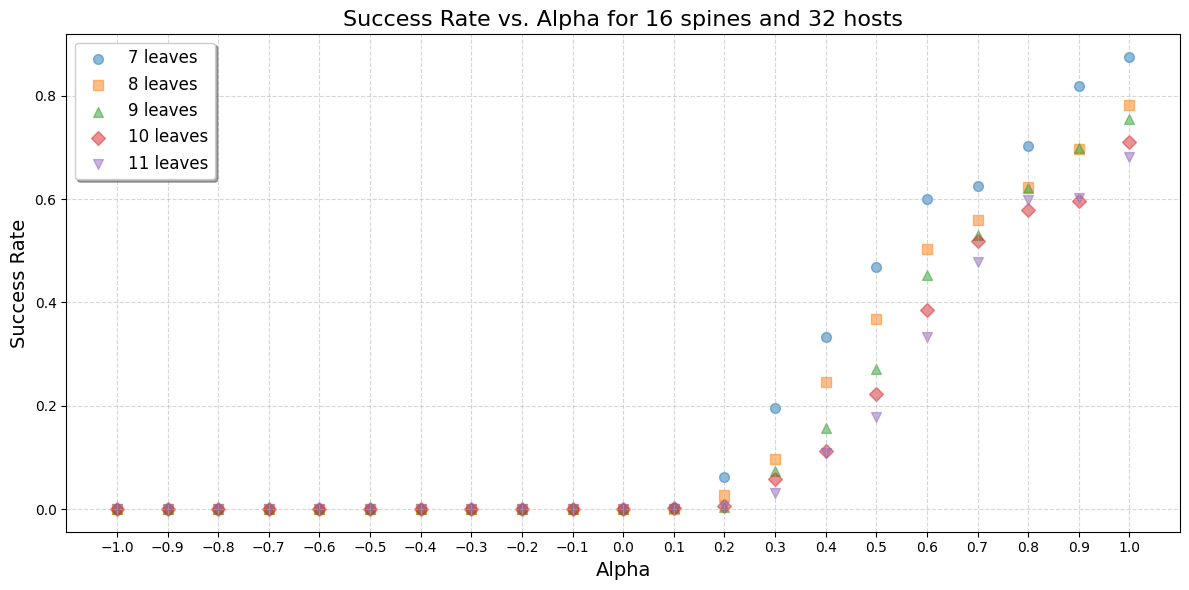

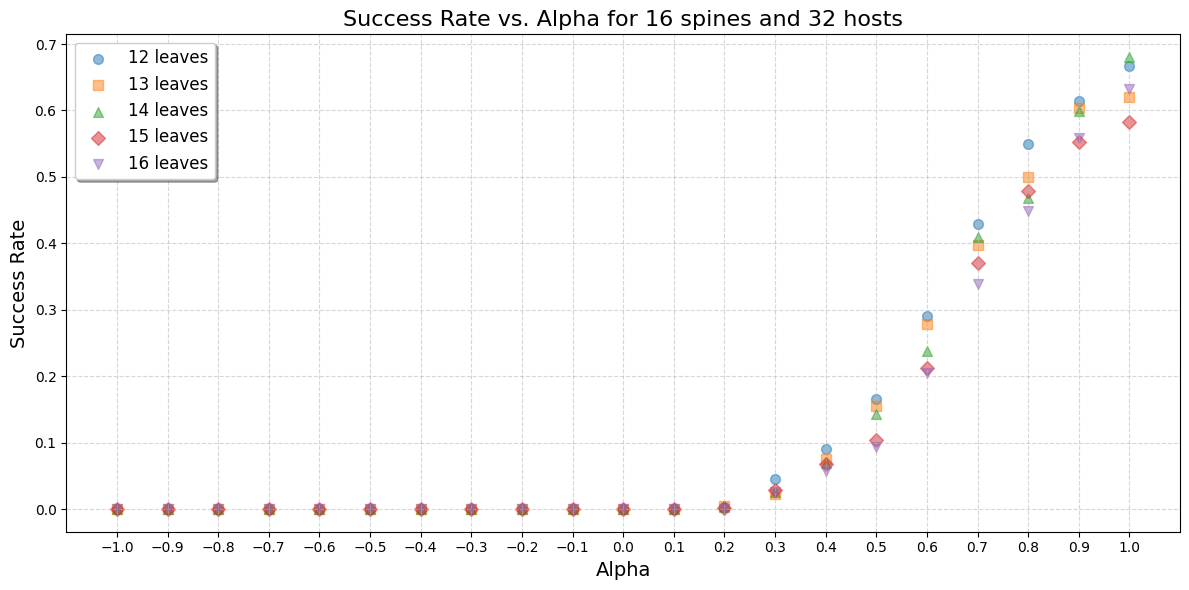

In [71]:
res = {}
for entry in os.listdir('./new_single_task_tests_scenario1'):
    t,l,s = list(map(int, entry.split('_')))
    alpha_test_dir = os.path.join('./new_single_task_tests_scenario1', entry)
    for alpha in os.listdir(alpha_test_dir):
        test_file_dir = os.path.join(alpha_test_dir, alpha)
        for test_name in os.listdir(test_file_dir):
            test_file = os.path.join(test_file_dir, test_name)
            with open(test_file, 'r') as f:
                result = json.load(f)
                if entry not in res:
                    res[entry] = {}
                res[entry][alpha] = result
plot_scenario_1_split(res, 16, alpha_list)

In [17]:
simulator_data = None
with open('../Simulator/statistic.json', 'r') as f:
    simulator_data = json.load(f)
simulator_data

{'10_32_16': [[1, 14, 8],
  [1, 15, 8],
  [1, 13, 8],
  [1, 15, 8],
  [0, 12, 8],
  [1, 14, 8],
  [0, 17, 8],
  [0, 15, 8],
  [1, 15, 8],
  [1, 14, 8],
  [1, 16, 8],
  [1, 15, 8],
  [0, 14, 8],
  [1, 16, 8],
  [0, 14, 10],
  [1, 14, 8],
  [0, 15, 8],
  [0, 14, 10],
  [1, 15, 8],
  [0, 15, 8],
  [1, 14, 8],
  [1, 15, 8],
  [1, 14, 8],
  [1, 15, 8],
  [1, 14, 8],
  [0, 15, 8],
  [1, 16, 8],
  [1, 16, 8],
  [1, 16, 8],
  [1, 14, 8],
  [0, 15, 8],
  [0, 15, 8],
  [0, 14, 8],
  [1, 15, 8],
  [0, 15, 8],
  [1, 13, 8],
  [0, 15, 8],
  [1, 13, 8],
  [0, 13, 8],
  [1, 16, 8],
  [0, 17, 8],
  [1, 15, 8],
  [0, 14, 11],
  [1, 15, 8],
  [0, 14, 8],
  [1, 14, 8],
  [0, 13, 8],
  [0, 13, 8],
  [0, 15, 8],
  [1, 14, 8],
  [1, 13, 8],
  [0, 15, 8],
  [1, 15, 8],
  [1, 15, 8],
  [0, 15, 8],
  [1, 13, 8],
  [1, 14, 8],
  [1, 15, 8],
  [1, 16, 8],
  [1, 13, 8],
  [0, 15, 8],
  [0, 13, 8],
  [1, 16, 8],
  [1, 15, 8],
  [0, 17, 8],
  [1, 17, 8],
  [1, 16, 8],
  [0, 14, 10],
  [0, 14, 8],
  [1, 15, 8],
  [1

In [74]:
def plot_simulator_data(simulator_data, leaves, spines):
    plot_data = []
    for t_l_s, vec in simulator_data.items():
        t, l, s = list(map(int, t_l_s.split('_')))
        if not(l==leaves and s==spines):
            continue
        rate = sum([x[0] for x in vec])/len(vec)
        ecmp_time = sum([x[1] for x in vec])/len(vec)
        scenario2_time = sum([x[2] for x in vec])/len(vec)
        plot_data.append([t, rate, ecmp_time, scenario2_time])

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.scatter([x[0] for x in plot_data], [x[2] for x in plot_data], label=f'average ecmp time', s=50, alpha=0.7, color='blue')
    ax1.scatter([x[0] for x in plot_data], [x[3] for x in plot_data], label=f'average scenario 2 time', s=50, alpha=0.7, color='green')

    ax2 = ax1.twinx()
    ax2.scatter([x[0] for x in plot_data], [x[1] for x in plot_data], label=f'success rate', s=50, alpha=0.7, color='red',marker='x')

    ax1.set_ylabel('Simulator time', fontsize=14, color='black')
    ax2.set_ylabel('Success rate', fontsize=14, color='red')
    ax1.tick_params(axis='y', colors='black')
    ax2.tick_params(axis='y', colors='red')
    
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc='best')
    
    plt.title(f'Scenario 2 results for {leaves} leaves, {spines} spines', fontsize=16)

    ax1.grid(True, linestyle='--', alpha=0.5)
    # plt.xlabel('Tasks', fontsize=14)
    ax1.set_xlabel('Tasks', fontsize=14)
    plt.xticks(list([x[0] for x in plot_data]))
    plt.tight_layout()
    plt.savefig(f'multi_task_scenario_2_simulator_{leaves}_{spines}.pdf', format='pdf')

    plt.show()


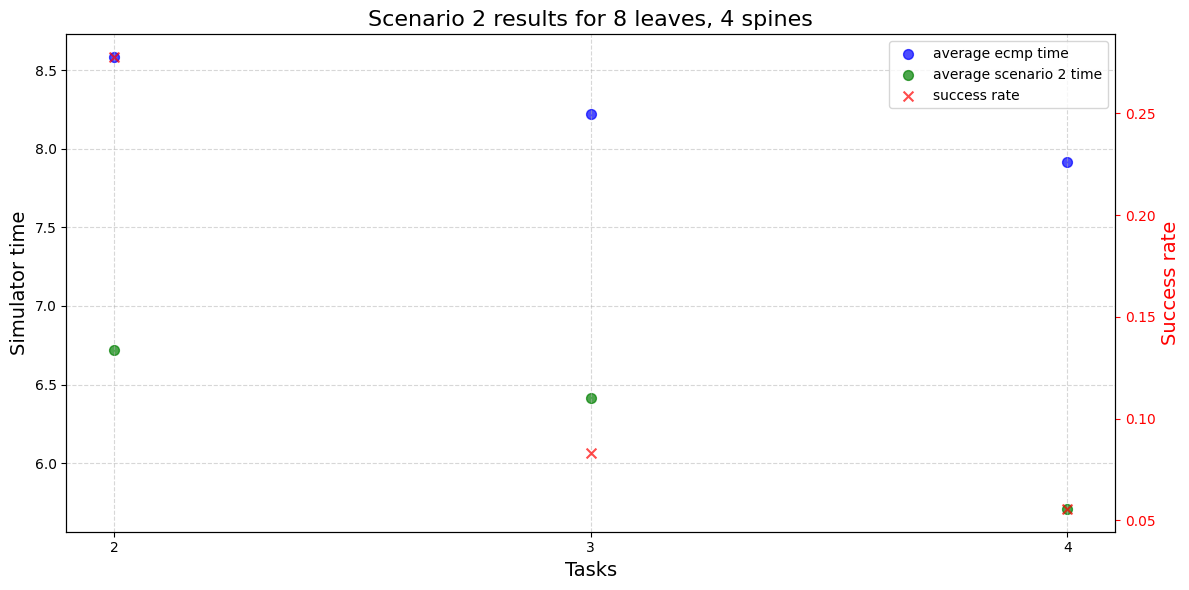

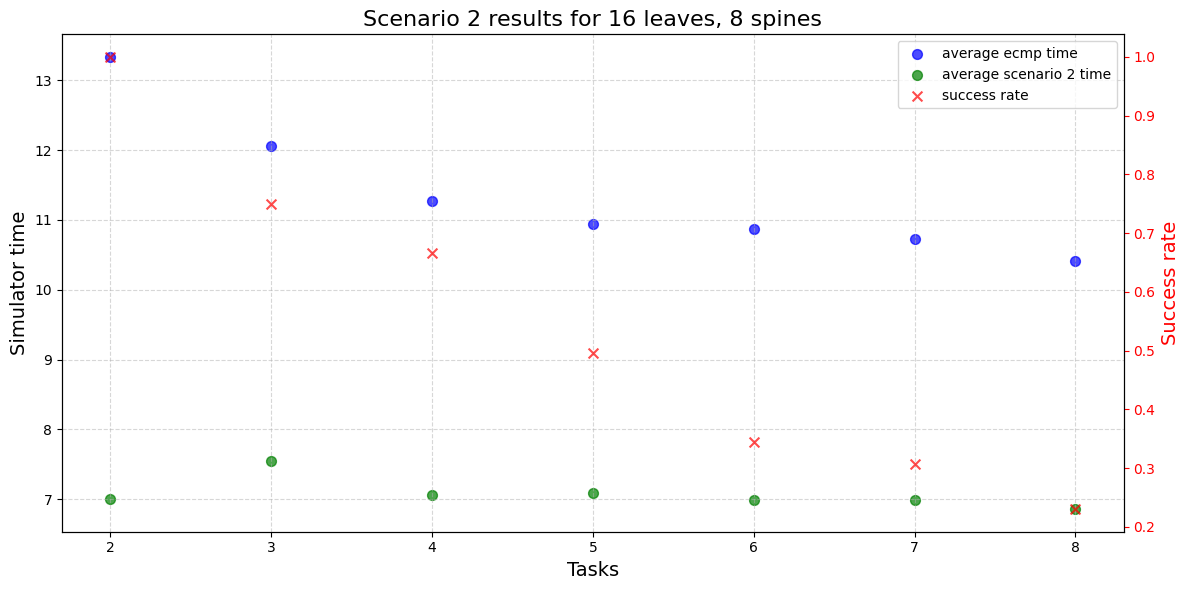

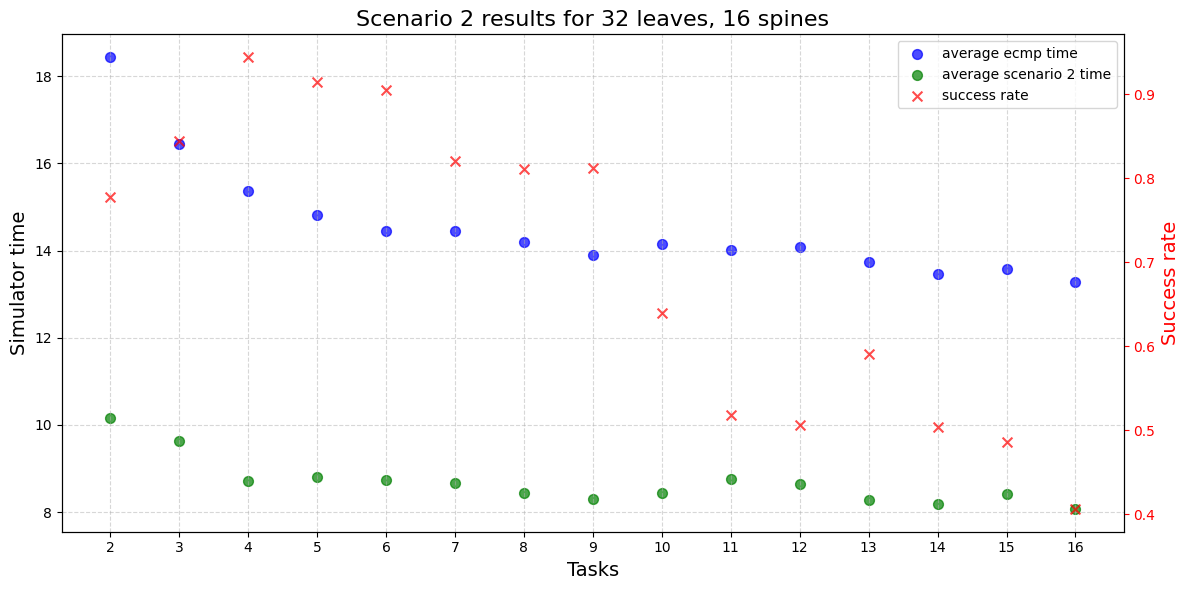

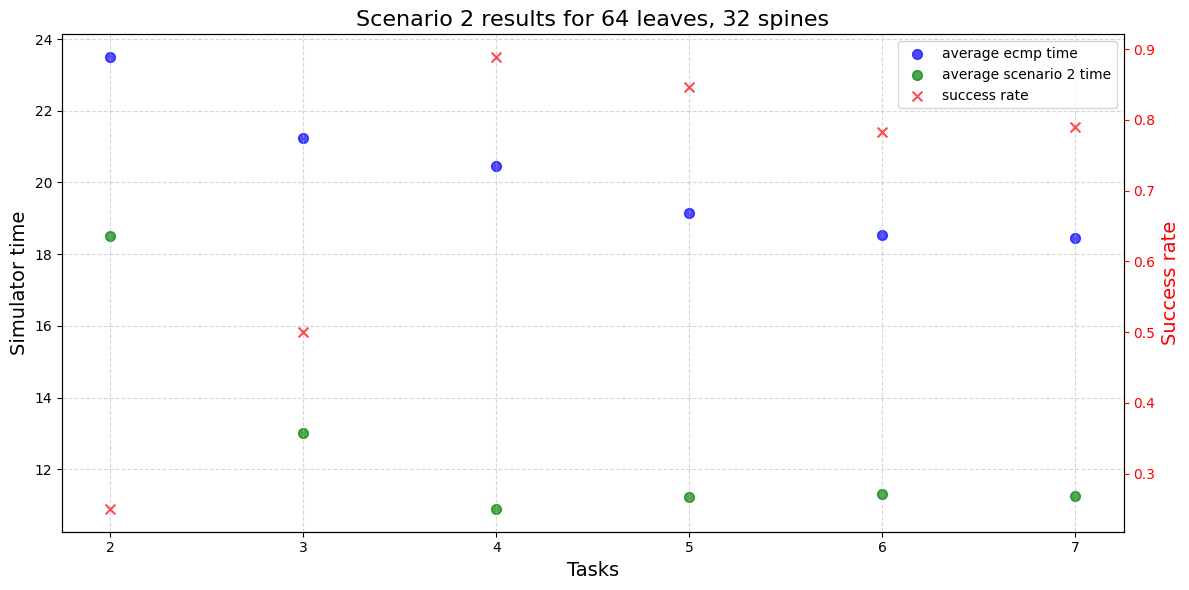

In [75]:
for l, s in [(8,4), (16, 8), (32, 16), (64, 32)]:
    plot_simulator_data(simulator_data, l, s)

In [18]:
for t_l_s, vec in simulator_data.items():
    for res, ecmp, scenario2 in vec:
        if ecmp < scenario2:
            print(t_l_s, res, ecmp, scenario2)

13_32_16 0 14 16
2_64_32 0 20 21
2_8_4 0 8 9
3_8_4 0 7 8
3_8_4 0 8 9
3_8_4 0 8 9
3_8_4 0 7 8
4_8_4 0 6 7
4_8_4 0 8 9
5_16_8 0 10 11
5_16_8 0 11 12
6_16_8 0 9 10
7_16_8 0 10 11
7_16_8 0 11 12


In [38]:
real_spines[16][32][64].keys()

dict_keys(['-0.1', '-0.2', '-0.3', '-0.4', '-0.5', '-0.6', '-0.7', '-0.8', '-0.9', '-1.0', '0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

In [16]:
real_spines[4][8][8]['-0.1'][1], "-----",real_spines[4][8][8]['-0.1'][0]

({(0, 0, 0, 0, 0, 1, 3, 4),
  (0, 0, 0, 0, 0, 2, 2, 4),
  (0, 0, 0, 0, 0, 2, 3, 3),
  (0, 0, 0, 0, 1, 1, 2, 4),
  (0, 0, 0, 0, 1, 1, 3, 3),
  (0, 0, 0, 0, 2, 2, 2, 2),
  (0, 0, 0, 1, 1, 2, 2, 2),
  (0, 0, 1, 1, 1, 1, 2, 2),
  (1, 1, 1, 1, 1, 1, 1, 1)},
 '-----',
 {(0, 0, 0, 0, 1, 2, 2, 3),
  (0, 0, 0, 1, 1, 1, 1, 4),
  (0, 0, 0, 1, 1, 1, 2, 3),
  (0, 0, 1, 1, 1, 1, 1, 3),
  (0, 1, 1, 1, 1, 1, 1, 2)})

In [17]:
def get_map(test):
    d = {}
    for x in test:
        if x not in d:
            d[x] = 0
        d[x] += 1
    d = dict(sorted(d.items()))
    return d

In [18]:
def value_test_map(d):
    wasted_colors = 0
    arr = list(reversed(d.items()))
    x_sum = 0
    for i, (deg, x_cnt) in enumerate(arr):
        x_sum += x_cnt
        if i+1 < len(arr) and deg > arr[i+1][0] + x_sum:
            wasted_colors += deg - arr[i+1][0] - x_sum
    return wasted_colors

In [19]:
value_test_map({2: 4, 3: 12, 4: 5, 5: 4, 6: 6, 8: 1})

1

In [20]:
%%time
good_maps = []
bad_maps = []
for spines, spine_dict in real_spines.items():
    for leaves, leaves_dict in spine_dict.items():
        for hosts, host_dict in leaves_dict.items():
            for alpha, tests_dict in host_dict.items():
                for test in tests_dict[0]:
                    bad_maps.append((spines, leaves, hosts, get_map(test)))
                for test in tests_dict[1]:
                    good_maps.append((spines, leaves, hosts, get_map(test)))

CPU times: total: 10.1 s
Wall time: 10.1 s


In [21]:
%%time
bad_value = [value_test_map(d[-1]) for d in bad_maps]
good_value = [value_test_map(d[-1]) for d in good_maps]
bad_mean, good_mean = sum(bad_value)/len(bad_value), sum(good_value)/len(good_value)
bad_mean, good_mean

CPU times: total: 2.25 s
Wall time: 2.25 s


(2.825976008845486, 0.15732846122614697)

In [22]:
x = [(d, value_test_map(d[-1])) for d in bad_maps if value_test_map(d[-1]) > 3]
print(len(x))
for y in x[:100]:
    print(y)

280268
((16, 32, 128, {0: 1, 1: 2, 2: 4, 3: 4, 4: 10, 5: 7, 6: 3, 13: 1}), 6)
((16, 32, 128, {1: 3, 2: 6, 3: 6, 4: 5, 5: 6, 6: 2, 7: 3, 12: 1}), 4)
((16, 32, 128, {1: 1, 2: 7, 3: 8, 4: 3, 5: 6, 6: 6, 11: 1}), 4)
((16, 32, 128, {1: 3, 2: 4, 3: 5, 4: 11, 5: 4, 6: 2, 7: 2, 12: 1}), 4)
((16, 32, 128, {1: 3, 2: 4, 3: 8, 4: 6, 5: 4, 6: 5, 7: 1, 12: 1}), 4)
((16, 32, 128, {1: 2, 2: 4, 3: 5, 4: 11, 5: 6, 6: 3, 11: 1}), 4)
((16, 32, 128, {1: 1, 2: 4, 3: 7, 4: 10, 5: 7, 6: 2, 11: 1}), 4)
((16, 32, 128, {1: 1, 2: 7, 3: 6, 4: 7, 5: 7, 6: 1, 7: 2, 12: 1}), 4)
((16, 32, 128, {0: 1, 2: 4, 3: 6, 4: 8, 5: 12, 10: 1}), 4)
((16, 32, 128, {1: 2, 2: 5, 3: 7, 4: 6, 5: 8, 6: 2, 7: 1, 12: 1}), 4)
((16, 32, 128, {0: 1, 1: 2, 2: 6, 3: 6, 4: 7, 5: 2, 6: 3, 7: 4, 12: 1}), 4)
((16, 32, 128, {1: 3, 2: 3, 3: 6, 4: 7, 5: 10, 6: 2, 11: 1}), 4)
((16, 32, 128, {1: 1, 2: 1, 3: 9, 4: 12, 5: 8, 10: 1}), 4)
((16, 32, 128, {1: 1, 2: 3, 3: 12, 4: 6, 5: 6, 6: 2, 7: 1, 12: 1}), 4)
((16, 32, 128, {1: 1, 2: 5, 3: 3, 4: 14, 5: 7, 

In [23]:
(2.825976008845486, 0.15732846122614697)

(2.825976008845486, 0.15732846122614697)

In [24]:
print(sorted(real_spines.keys()))

[4, 8, 16, 32]


In [70]:
arr = []
for spines, spine_dict in real_spines.items():
    for leaves, leaves_dict in spine_dict.items():
        for hosts, host_dict in leaves_dict.items():
            for alpha, tests_dict in host_dict.items():
                true = len(tests_dict[1])
                false = len(tests_dict[0])
                # if (true + false < 10):
                #     continue
                arr.append((spines, leaves, hosts, alpha, 'true', true, 'false', false, 100*true/(true+false)))
arr = sorted(arr, key=lambda x: x[-1], reverse=True)
[x for x in arr if x[5] + x[7] >= 100]

[(8, 16, 64, '0.9', 'true', 221, 'false', 53, 80.65693430656934),
 (8, 16, 64, '1.0', 'true', 154, 'false', 42, 78.57142857142857),
 (8, 16, 64, '0.8', 'true', 301, 'false', 110, 73.2360097323601),
 (8, 16, 64, '0.7', 'true', 421, 'false', 162, 72.21269296740995),
 (8, 16, 64, '0.6', 'true', 633, 'false', 255, 71.28378378378379),
 (8, 16, 64, '0.5', 'true', 909, 'false', 447, 67.03539823008849),
 (8, 16, 64, '0.4', 'true', 1343, 'false', 718, 65.16254245511888),
 (8, 16, 64, '0.3', 'true', 1762, 'false', 1177, 59.952364749914935),
 (4, 16, 32, '0.5', 'true', 64, 'false', 43, 59.81308411214953),
 (4, 16, 32, '0.3', 'true', 77, 'false', 53, 59.23076923076923),
 (8, 16, 64, '-0.6', 'true', 100, 'false', 76, 56.81818181818182),
 (8, 16, 64, '-0.7', 'true', 67, 'false', 52, 56.30252100840336),
 (8, 16, 64, '-0.4', 'true', 213, 'false', 172, 55.324675324675326),
 (8, 16, 64, '-0.5', 'true', 141, 'false', 117, 54.651162790697676),
 (8, 16, 64, '0.2', 'true', 1960, 'false', 1638, 54.4747081712

In [71]:
hosts = 32
leaves = 16
spines = 8

[x for x in arr if x[2] == hosts and x[1]==leaves and x[0] == spines]

[(8, 16, 32, '1.0', 'true', 124, 'false', 127, 49.40239043824701),
 (8, 16, 32, '0.9', 'true', 167, 'false', 191, 46.64804469273743),
 (8, 16, 32, '0.8', 'true', 201, 'false', 298, 40.28056112224449),
 (8, 16, 32, '0.7', 'true', 238, 'false', 388, 38.019169329073485),
 (8, 16, 32, '0.5', 'true', 384, 'false', 779, 33.01805674978504),
 (8, 16, 32, '0.6', 'true', 290, 'false', 598, 32.65765765765766),
 (8, 16, 32, '0.4', 'true', 406, 'false', 911, 30.827638572513287),
 (8, 16, 32, '-1.0', 'true', 16, 'false', 46, 25.806451612903224),
 (8, 16, 32, '-0.9', 'true', 18, 'false', 52, 25.714285714285715),
 (8, 16, 32, '0.3', 'true', 337, 'false', 976, 25.666412795125666),
 (8, 16, 32, '-0.6', 'true', 30, 'false', 96, 23.80952380952381),
 (8, 16, 32, '-0.8', 'true', 20, 'false', 68, 22.727272727272727),
 (8, 16, 32, '0.2', 'true', 267, 'false', 908, 22.72340425531915),
 (8, 16, 32, '-0.4', 'true', 47, 'false', 168, 21.86046511627907),
 (8, 16, 32, '-0.3', 'true', 56, 'false', 215, 20.6642066420

In [27]:
hosts = 32
s = []
for tests_num in range(0, 10000):
    try:
        s.append([x for x in arr if x[2]==hosts and x[5]+x[7] >= tests_num][0])
    except:
        pass
list(dict.fromkeys(s))

[(4, 16, 32, '0.9', 'true', 52, 'false', 14, 78.78787878787878),
 (4, 16, 32, '0.8', 'true', 52, 'false', 24, 68.42105263157895),
 (4, 16, 32, '0.7', 'true', 52, 'false', 33, 61.1764705882353),
 (4, 16, 32, '0.5', 'true', 64, 'false', 43, 59.81308411214953),
 (4, 16, 32, '0.3', 'true', 77, 'false', 53, 59.23076923076923),
 (4, 16, 32, '0.2', 'true', 74, 'false', 64, 53.6231884057971),
 (4, 16, 32, '0.0', 'true', 73, 'false', 68, 51.773049645390074),
 (4, 16, 32, '0.1', 'true', 73, 'false', 74, 49.65986394557823),
 (8, 16, 32, '1.0', 'true', 124, 'false', 127, 49.40239043824701),
 (8, 16, 32, '0.9', 'true', 167, 'false', 191, 46.64804469273743),
 (8, 16, 32, '0.8', 'true', 201, 'false', 298, 40.28056112224449),
 (8, 16, 32, '0.7', 'true', 238, 'false', 388, 38.019169329073485),
 (8, 16, 32, '0.5', 'true', 384, 'false', 779, 33.01805674978504),
 (8, 16, 32, '0.4', 'true', 406, 'false', 911, 30.827638572513287)]

In [28]:
def get_all_good_tests(leaves, hosts):
    # leaves = 32
    # hosts = 64
    all_good_tests = []
    all_bad_tests = []
    for spines, spine_dict in real_spines.items():
        if leaves not in spine_dict:
            continue
        leaves_dict = spine_dict[leaves]
        if hosts not in leaves_dict:
            continue
        host_dict = leaves_dict[hosts]
        for alpha, tests_dict in host_dict.items():
            all_good_tests.extend(tests_dict[1])
            all_bad_tests.extend(tests_dict[0])
    all_good_tests = list(dict.fromkeys(all_good_tests))
    all_bad_tests = list(dict.fromkeys(all_bad_tests))
    return all_good_tests, all_bad_tests

2715 100597


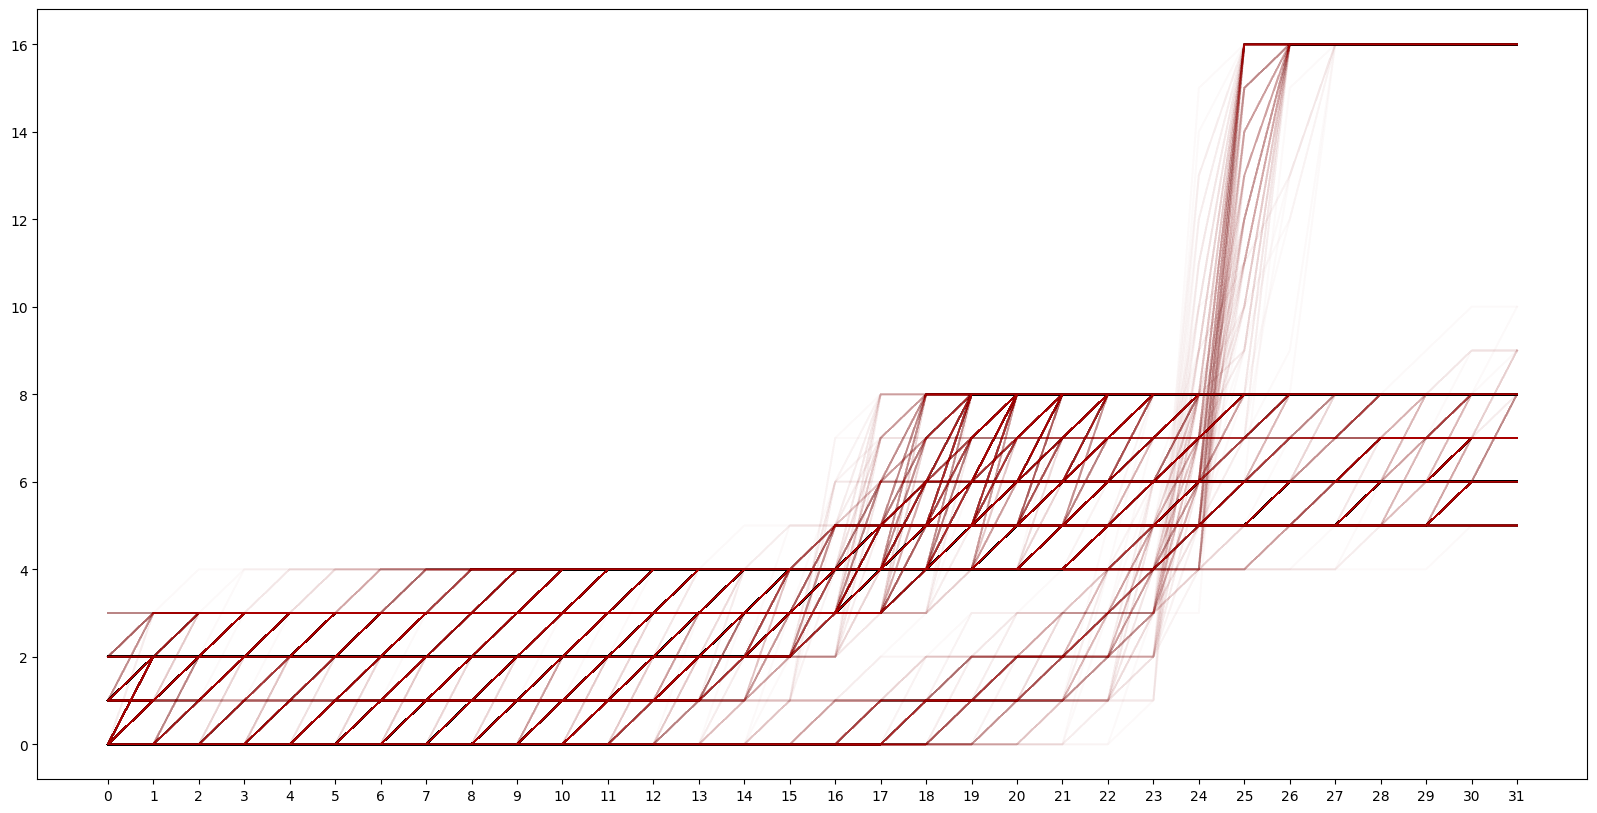

CPU times: total: 32.8 s
Wall time: 32.8 s


In [29]:
%%time
leaves = 32
hosts = 128
all_good_tests, all_bad_tests = get_all_good_tests(leaves=leaves, hosts=hosts)
print(len(all_good_tests), len(all_bad_tests))
plt.figure(figsize=(20, 10))
for test in all_good_tests:
    plt.plot(list(range(leaves)), test, 'black',alpha=0.01)
    plt.xticks(list(range(leaves)))
for test in all_good_tests:
    plt.plot(list(range(leaves)), test, 'r-',alpha=0.01)
    plt.xticks(list(range(leaves)))
plt.show()

In [67]:
len(all_bad_tests)

4401

In [61]:
name = '64_16_8'
tests = {}

directory_path = f'new_tests/{name}'
for entry in os.listdir(directory_path):
    full_path = os.path.join(directory_path, entry)
    # tests[entry] = []
    for test_file in os.listdir(full_path):
        test_path = os.path.join(full_path, test_file)
        with open(test_path, 'r') as f:
            test_data = json.load(f)
            tests[entry] = test_data
    

In [24]:
tests.keys()

dict_keys(['-0.8', '0.6', '0.5', '-0.4', '-0.5', '0.8', '0.7', '-0.9', '0.3', '0.9', '-0.1', '0.4', '-0.2', '-0.7', '-0.3', '0.0', '-1.0', '0.2', '1.0', '0.1', '-0.6'])

In [25]:
results_file = f'{name}.json'
with open(results_file, 'r') as f:
    result = json.load(f)

In [26]:
len(result['-0.1']), len(tests['-0.1'])

(1854, 1854)

In [65]:
Data = {k:[(tests[k][i][0], result[k][i]) for i in range(len(tests[k]))] for k in tests}

In [66]:
Data['-0.1']

[([0, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 7, 7], 1),
 ([1, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6], 1),
 ([0, 2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 7], 0),
 ([1, 1, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6], 1),
 ([1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7], 0),
 ([1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 7, 7, 8], 0),
 ([0, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 5, 6, 6, 7, 8], 1),
 ([2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 5, 5, 6, 7, 7, 7], 0),
 ([2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 8, 8], 1),
 ([1, 2, 2, 2, 2, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 8], 1),
 ([2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7], 0),
 ([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 7, 8], 0),
 ([1, 2, 2, 2, 2, 4, 4, 4, 4, 5, 5, 5, 5, 5, 7, 7], 1),
 ([1, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5], 1),
 ([0, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 6, 6, 8, 8], 1),
 ([0, 1, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6], 1),
 ([0, 1, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 6, 7, 8], 1),
 ([0, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 7, 

In [28]:
# Data

In [29]:
good_tests = []
for alpha, tests_data in Data.items():
    for test in tests_data:
        if (test[1]==1):
            good_tests.append(test[0][0])
            # print(alpha, test)
print(len(good_tests))
good_tests = list(map(list,set(map(tuple,good_tests))))
print(len(good_tests))

13609
5694


In [30]:
bad_tests = []
for alpha, tests_data in Data.items():
    for test in tests_data:
        if (test[1]==0):
            bad_tests.append(test[0][0])
            # print(alpha, test)
print(len(bad_tests))
bad_tests = list(map(list,set(map(tuple,bad_tests))))
print(len(bad_tests))

9920
4401


In [31]:
%%time
results = []
for alpha, tests_data in Data.items():
    good_tests_size = sum([1 for test in tests_data if test[1]==1])
    results.append((alpha, good_tests_size/len(tests_data)))
results = sorted(results)
results

CPU times: user 915 μs, sys: 0 ns, total: 915 μs
Wall time: 921 μs


[('-0.1', 0.5226537216828478),
 ('-0.2', 0.5327354260089686),
 ('-0.3', 0.5245398773006135),
 ('-0.4', 0.5532467532467532),
 ('-0.5', 0.5465116279069767),
 ('-0.6', 0.5681818181818182),
 ('-0.7', 0.5630252100840336),
 ('-0.8', 0.5360824742268041),
 ('-0.9', 0.5857142857142857),
 ('-1.0', 0.6226415094339622),
 ('0.0', 0.5071377587437544),
 ('0.1', 0.5304777594728172),
 ('0.2', 0.5447470817120622),
 ('0.3', 0.5995236474991493),
 ('0.4', 0.6516254245511888),
 ('0.5', 0.6703539823008849),
 ('0.6', 0.7128378378378378),
 ('0.7', 0.7221269296740995),
 ('0.8', 0.732360097323601),
 ('0.9', 0.8065693430656934),
 ('1.0', 0.7857142857142857)]

In [32]:
len(good_tests), len(bad_tests), 100*len(good_tests)/(len(bad_tests)+len(good_tests))

(5694, 4401, 56.40416047548291)

In [33]:
print(good_tests[0])

[1, 2, 2, 2, 2, 3, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6]


In [15]:
print(bad_tests[0])

[0, 0, 1, 1, 1, 1, 3, 4, 4, 4, 6, 7, 8, 8, 8, 8]


In [16]:
b = None
g = None
error = 1e10
for bad in bad_tests:
    for good in good_tests:
        bad = np.array(bad)
        good = np.array(good)
        if (bad == good).all():
            continue
        new_error = np.sum(np.abs(good - bad))
        if (new_error < error):
            error = new_error
            b = bad
            g = good
            print(error, 'bad', b, 'good', g)
b, g

24 bad [0 0 1 1 1 1 3 4 4 4 6 7 8 8 8 8] good [1 2 2 2 2 3 4 5 5 5 5 5 5 6 6 6]
8 bad [0 0 1 1 1 1 3 4 4 4 6 7 8 8 8 8] good [0 0 1 1 2 2 2 3 4 6 6 7 7 7 8 8]
6 bad [0 0 1 1 1 1 3 4 4 4 6 7 8 8 8 8] good [0 0 0 1 1 2 3 3 5 5 6 7 7 8 8 8]
4 bad [0 0 1 1 1 1 3 4 4 4 6 7 8 8 8 8] good [0 0 0 1 1 1 3 4 5 5 6 7 7 8 8 8]
2 bad [0 0 1 1 1 1 3 4 4 4 6 7 8 8 8 8] good [0 1 1 1 1 1 2 4 4 4 6 7 8 8 8 8]


(array([0, 0, 1, 1, 1, 1, 3, 4, 4, 4, 6, 7, 8, 8, 8, 8]),
 array([0, 1, 1, 1, 1, 1, 2, 4, 4, 4, 6, 7, 8, 8, 8, 8]))

In [120]:
hosts, leaves, spines = list(map(int, name.split('_')))
hosts, leaves, spines

(128, 32, 16)

In [121]:
mean_deriviate = 0
for test in bad_tests:
    test = np.array(test)
    mean_deriviate += np.sqrt(np.sum((test- (hosts/leaves) )**2)/leaves)
mean_deriviate/len(bad_tests)

np.float64(3.615134720844577)

In [122]:
mean_deriviate = 0
for test in good_tests:
    test = np.array(test)
    mean_deriviate += np.sqrt(np.sum((test-(hosts/leaves))**2)/leaves)
mean_deriviate/len(good_tests)

np.float64(2.631847634565388)